In [154]:
import pandas as pd
from sudulunu.helpers import pp, make_num, dumper
import os 

In [155]:
def combine_from_folder(pathos):
  
  listo = []
  
  fillos = os.listdir(pathos)
  fillos = [pathos + '/' + x for x in fillos if '.csv' in x]
  # print(fillos)

  city_dicto = {}
  for city in fillos:
    city_dicto[city] = city.replace("data/", '').replace('.csv', '')
  
  # print(city_dicto)

  for fillo in fillos:
    inter = pd.read_csv(fillo)

    temp_col = [x for x in inter.columns.tolist() if 'time' in x.lower()]
    inter.rename(columns={temp_col[0]: "Time"}, inplace=True)
    inter['City'] = city_dicto[fillo]

    listo.append(inter)

  cat = pd.concat(listo)

  return cat

data = combine_from_folder('data')


In [156]:
df = data.copy()
# 'Time', 'Temp (°C)', 'Feels Like (°C)', 'Humidity(%)', 
# 'Wind Direction', 'Wind Speed (km/h) (knots)', 'Wind Gust (km/h) (knots)', 
# 'Pressure (hPa)', 'Rainfall since 9 am (mm)', 'Date', 'City'

df = df[['Time', 'Temp (°C)', 'Date','City']]
# df = df[['Time', 'Feels Like (°C)', 'Date','City']]

# pp(df)

### Only keep the whole hour data
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
# df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0) & df['Time'].dt.hour.gt(9)]
df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0)]


In [157]:
listo = []
# for city in df['City'].unique().tolist():
#     inter = df.loc[df['City'] == city].copy()
#     inter = make_num(inter, 'Temp (°C)')
#     grp = inter.groupby(by=['Time'])['Temp (°C)'].mean().reset_index()
#     grp['']
#     listo.append(grp)

# cat = pd.concat(listo)

# df = make_num(df, 'Feels Like (°C)')
# grp = df.groupby(by=['City', 'Time'])['Feels Like (°C)'].mean().reset_index()

df = make_num(df, 'Temp (°C)')
grp = df.groupby(by=['City', 'Time'])['Temp (°C)'].mean().reset_index()
grp.sort_values(by=['City', 'Time'], ascending=True, inplace=True)



grp['Time'] = grp['Time'].dt.strftime("%H:%M")

# pp(grp)

In [158]:
piv = pd.pivot(grp, index='City', columns='Time').reset_index()

pp(piv)

           City  Temp (°C)                                              \
Time                 00:00      01:00      02:00      03:00      04:00   
0      Adelaide  17.033333  16.333333  15.366667  15.300000  15.000000   
1      Brisbane  21.233333  20.633333  20.466667  20.366667  20.033333   
2      Canberra  15.400000  13.733333  13.766667  13.633333  13.166667   
3        Hobart  18.433333  18.033333  17.733333  17.300000  16.566667   
4     Melbourne  20.566667  20.433333  19.533333  19.066667  19.366667   
5         Perth  21.866667  22.566667  21.700000  21.933333  21.133333   
6        Sydney  21.433333  21.400000  20.566667  20.166667  19.733333   

                                                  ...                        \
Time      05:00      06:00      07:00      08:00  ...      14:00      15:00   
0     14.500000  14.266667  20.366667  21.200000  ...  26.366667  26.966667   
1     19.666667  19.633333  20.900000  23.500000  ...  27.133333  26.233333   
2     12.033333  

<AxesSubplot: xlabel='None-Time', ylabel='City'>

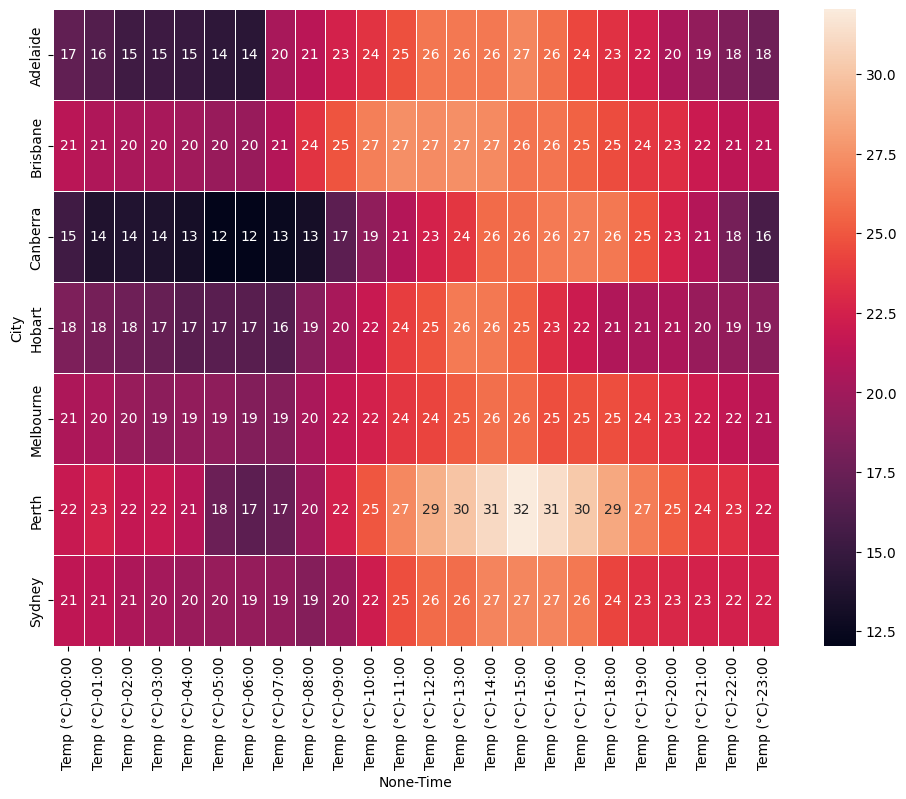

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

piv.set_index("City", inplace=True)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(piv, annot=True, linewidth=0.5)

        City      Range
6      Perth       15.2
3   Canberra  14.566667
1   Adelaide       12.7
4     Hobart       10.0
7     Sydney   8.266667
2   Brisbane   7.733333
5  Melbourne   7.366667
['City', 'Range']


/var/folders/1h/4w391kn52y51w5mmd37_xfn80000gq/T/ipykernel_12360/2690026419.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))


<AxesSubplot: xlabel='City', ylabel='Range'>

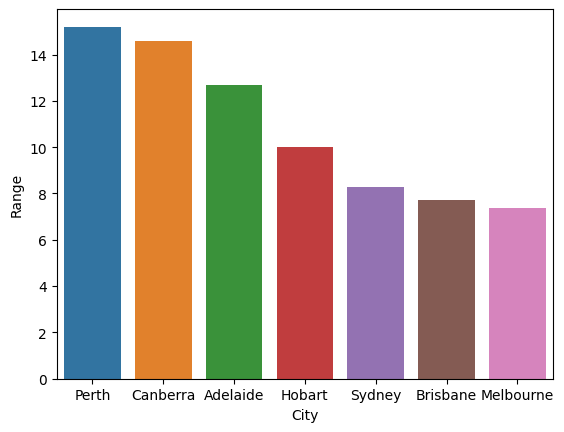

In [160]:
biv = pd.pivot(grp, index='Time', columns='City').reset_index()

biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))
biv = biv.loc[biv.index == 'Range']

biv = biv.T.reset_index()
biv = biv[1:]
biv = biv[['City', 'Range']]
biv.sort_values(by=['Range'], inplace=True, ascending=False)

pp(biv)

sns.barplot(data=biv, x="City", y="Range")